# Laboratorio 3

-  [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel)

#####  LINK DE REPOSITORIO
https://github.com/FabianKel/LAB3-IA

## Task 1 - Preguntas Teóricas

1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de
gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

| Método                        | Descripción                                                                 | Ventajas                                                                 | Desventajas                                                                 |
|-------------------------------|---------------------------------------------------------------------------|--------------------------------------------------------------------------|---------------------------------------------------------------------------|
| Descenso de Gradiente         | Minimiza el error de predicción de un modelo donde va recorriendo con la diferencia entre el resultado obtenido y el que se busca obtener | Convergencia precisa y estable.                                           | Puede ser lento para grandes conjuntos de datos.                           |
| Descenso de Gradiente Estocástico | Actualiza los parámetros usando un solo ejemplo en cada iteración. Donde seleciona na observación aleatoria para minimizar la función de pérdida         | Rápido y puede escapar de mínimos locales.                                | Es menos precisa.                                      |
| Descenso de Gradiente por Mini Batches | Actualiza los parámetros usando un pequeño subconjunto de datos en cada iteración. | Balance entre velocidad y precisión, y aprovecha la paralelización.       | Selección del tamaño del mini batch puede ser complicada.                  |

2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature
selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.

### Feature Extraction
Se transforman las features originales en nuevas features, disminuyendo la dimensión pero siempre manteniendo información relevante.
##### Técnicas:
* PCA (Principle Componemts Analysis):
    * Encuentra combinaciones lineales ortogonales de las features originales que maximizan la varianza.
* ICA (Independent Component Analysis):
    * Separa señales en componentes estadísticamente independientes, es útil cuando las fuentes son no gaussianas
    
##### Ventajas:
* El dataset es menos complejo
* Requiere menos espacio y menos tiempo de computación
* Hay menos chances de causar ```overfitting``` en el modelo


### Feature Selection
Como dice el nombre, se trata de seleccionar un subconjunto de las características originales basado en su relevancia para el modelo.
##### Técnicas:
* Filtrado:
    * Se seleccionan features con alta correlación con la variable objetivo.
* Wrapper:
    * Se entrenan modelos añadiendo features una por una hasta optimizar las métricas.
* Embedded:

##### Ventajas:
* Se mantienen las features originales.
* Tiene más eficiencia Computacional
* Se reduce el ```overfitting```

3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin
backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.

#### Arquitectura y Funcionamiento de un Perceptrón de una sola capa

Es el modelo más básico de una red neuronal artificial, propuesto por Frank Rosenblatt en 1957 y es la base de modelos más complejos como las redes neuronales multicapa.

##### Arquitectura
1. Capa de Entrada:
    * Recibe los valores de las features del dato de entrada.
2. Pesos y Sesgo (Bias):
    * Cada característica tiene un peso, el cuál se ajusta a su importancia en la predicción.
    * Hay un sesgo que actúa como un umbral de activación

##### Funcionamiento
1. Entrada:
    * Se alimentan las características:
     $$ x = [x_{1}, x_{2}, ..., x_n] $$
    * Suma Ponderada
    $$ z = \sum_{i=1}^{n} w_i x_i + b $$
    * Aplicar la función escalón:
    $$ y = f(z) = \begin{cases} 1 & \text{si } z \geq 0, \\ 0 & \text{en otro caso} \end{cases} $$ 
    * ```y``` es la predicción final

##### Aprendizaje
El perceptrón ajusta sus pesos y sesgo para minimizar los errores de clasificación mediante un enfoque supervisado.
1. Inicialización:
    * Los pesos y el sesgo se inicializan aleatoriamente
2. Actualización de Parámetros:
    * Para cada muestra (x, y) en el dataset:
        * Calcula la predicción y
        * Si la predicción final no es correcta,  se actualizan los pesos y el sesgo de la siguiente manera:
        $$ w_i <- w_i + η * (y_{true} - y) * x_i $$
        $$ b <- b + η * (y_{true} - y) $$
        *  donde ```w``` es el peso, ```b``` es el sesgo y ```η``` es el learning rate.
3. Convergencia:
    * Repite el proceso hasta que no haya errores o se alcance el límite de iteraciones.
 


## Task 2 - Ejercicios Prácticos

### Task 2.1 - Gradiente Descendiente Estocástico

Implemente el descenso de gradiente estocástico, el descenso de gradiente y el descenso de gradiente por mini
batches para una función polinómica de grado 3. Luego, grafique la función aproximada por cada uno de los métodos
solicitados y la distribución real de puntos. Para esto considere que:
* El polinomio que debe usar es 2 * x^3 - 3 * x^2 + 5 * x + 3
* Considere el uso de ```np.polyval```
* Considere el uso de ```np.polyder```
* Compare el tiempo de ejecución de cada uno de los métodos solicitados. De esto, mencione cuál método
fue más rápido y por qué.
* Compare el fitness de cada método solicitado (recuerde hacer una evaluación numérica y no sólo visual). De
esto mencione cuál método lo hizo mejor y por qué

### **Importar las librerías a utilizar** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from sklearn.model_selection import train_test_split

%matplotlib inline


### **Definir polinomio**

In [2]:

# 1. Definir el polinomio y su derivada
coefs = [2, -3, 5, 3] 
poly = np.poly1d(coefs)
deriv_poly = np.polyder(poly)

### **Generar datos**

In [3]:
# 2. Generación de datos
np.random.seed(1316)
x_data = np.linspace(-2, 2, 150)
y_data = poly(x_data) + np.random.normal(0, 2, size=x_data.shape) 

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1316)

### Task 2.2 - Feature Selection

Tome de nuevo el dataset del laboratorio pasado referente a la clasificación de Partidas de League of Legends.

Sobre este aplique al menos 3 técnicas de feature selection distintas, y con el dataset resultante vuelva a ajustar el modelo de Support Vector Machine (de la librería Sklearn).

Recuerde que:
* Debe definir una métrica de desempeño y justificar el por qué de esta métrica
* Mida el performance de su modelo con las tres técnicas de feature selection y compare cada una de ellas. Es decir, debe tener al menos 4 valores a comparar (el obtenido en el laboratorio pasado, y al menos 3 de las técnicas de feature selection)
* De las medidas obtenidas, diga qué versión lo hizo mejor y por qué.
* Recuerde que para hacer parameter tuning, deben usar las mismas columnas seleccionadas después del
feature selection
* Recuerde que su variable objetivo es “blueWins”

### Task 2.3 - Perceptrón

Implemente un perceptrón de una sola capa para realizar una clasificación binaria del dataset de Iris(incluido en ```sklearn.datasets.load_iris```). Visualice la frontera de decisión que fue aprendida por el perceptrón.
Recuerde que:
* Debe cargar el dataset de Iris desde la librería mencionada
* Use solamente dos features, siendo estos sepal length y sepal width
* Asegúrese de que su clase Perceptron tenga los métodos de fit y predict
* Visualice la frontera de decisión
    * El eje Y debería ser sepal width y el eje X debería ser sepal length
* Debe definir una métrica de desempeño y justificar el por qué de esta métrica. Con dicha métrica, evalúe el rendimiento de su modelo. Es decir, diga si lo hizo bien o no y el por qué.

### **Importación dataset y librerías**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

### **Carga y prueba de datos**

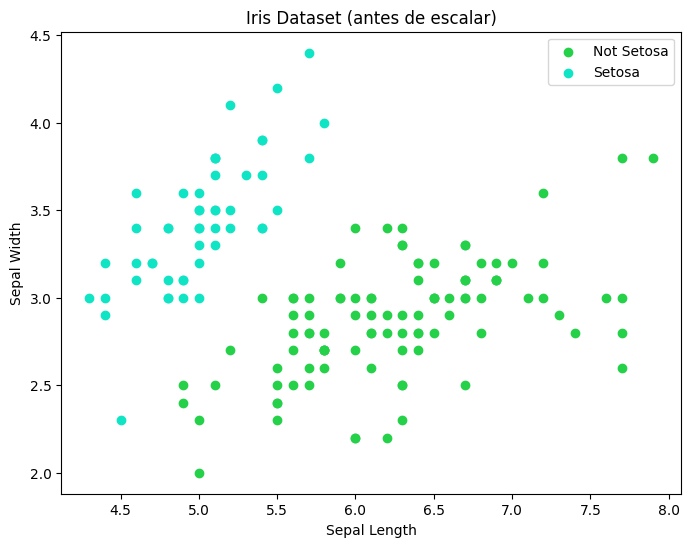

In [ ]:
# Dataset Iris
iris = load_iris()

# sepal length y sepal width
X = iris.data[:, [0, 1]]

# Convertir a clasificación binaria: Setosa (1) vs Others (0)
y = (iris.target == 0).astype(int)

# Visualizar los datos sin procesar
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='#24d149', label='Not Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='#0fe5c4', label='Setosa')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (antes de escalar)')
plt.legend()
plt.show()

### **Escalamiento de datos**

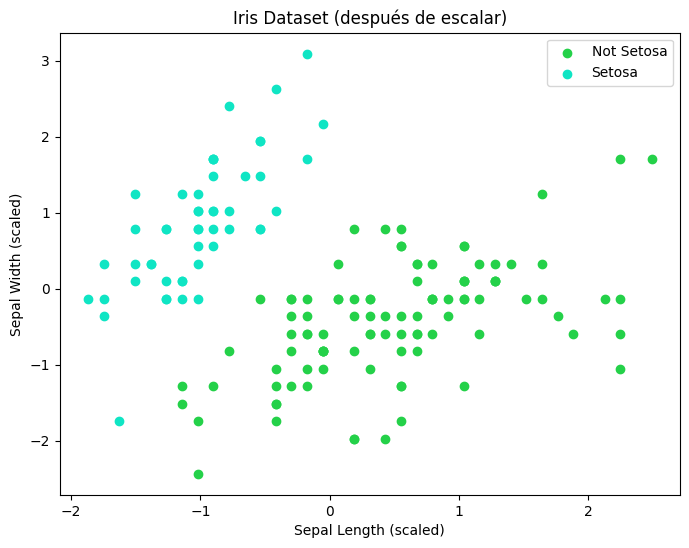

In [ ]:
# Escalar los features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar los datos escalados
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='#24d149', label='Not Setosa')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='#0fe5c4', label='Setosa')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Iris Dataset (después de escalar)')
plt.legend()
plt.show()

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Entrenamiento
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = 1 if linear_output >= 0 else 0
                
                # Actualizar 
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

### **División de datos**

In [ ]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("Forma del conjunto de entrenamiento:", X_train.shape)
print("Forma del conjunto de prueba:", X_test.shape)

Forma del conjunto de entrenamiento: (120, 2)
Forma del conjunto de prueba: (30, 2)


### **Perceptrón | Métrica de desempeño**

In [ ]:
# Crear y entrenar el perceptrón
perceptron = Perceptron(learning_rate=0.01, n_iterations=100)
perceptron.fit(X_train, y_train)

# Hacer predicciones
y_pred = perceptron.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



El uso de métrica de desempeño fue accuracy, debido a que es más preciso al tener datos binarios como también cuando las clases se encuentran balanceadas. En este caso el Acurracy fue de 1.00 o bien de 100% lo cuál significa que se clasificaron bien los datos con respecto a las clases Setosa y No-Setosa. 

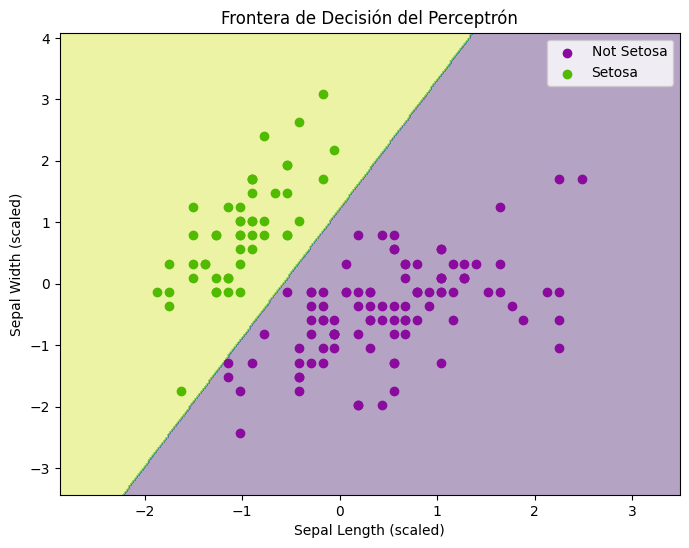

In [ ]:
# Crear una malla para visualizar la frontera de decisión
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predicciones en la malla
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Grafica
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='#8a0b9e', label='Not Setosa')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='#50bb00', label='Setosa')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Frontera de Decisión del Perceptrón')
plt.legend()
plt.show()

## Referencias 

Mini-batch Gradient Descent. (s/f). Interactivechaos.com. https://interactivechaos.com/es/manual/tutorial-de-deep-learning/mini-batch-gradient-descent

Qué es Descenso de gradiente estocástico (SGD) Concepto y definición. Glosario. (s/f). GAMCO, SL. Recuperado el 9 de febrero de 2025, de https://gamco.es/glosario/descenso-de-gradiente-estocastico-sgd/

¿Qué es el descenso del gradiente? (2024, abril 25). Ibm.com. https://www.ibm.com/mx-es/topics/gradient-descent